# *Homework: Exercises on Vectors*
## Autor: Thomas Santiago Beltran Arias

#### Implementacion de la clase vector, clase stack y las funciones; removeDuplicates y mergeSortedVectors

In [ ]:
%%writefile vectoresclass.cpp

#include <iostream>
#include <cassert>
#include <fstream>
#include <random>
#include <chrono>

using namespace std;

template <typename T>

class Vector{
    private:
    T* storage;
    unsigned int size_;
    unsigned int capacity_;
    unsigned int counter_;

    public:
    Vector(){
        capacity_ = 5;
        storage = new T[capacity_];
        size_ = 0;
        counter_ = 0;
    }

    Vector(unsigned int c, T elem = T()){
        capacity_ = c;
        storage = new T[capacity_];
        for(unsigned int i = 0; i < capacity_; i++){
            storage[i] = elem;
        }
        size_ = capacity_;
    }
    Vector(initializer_list<T> list){
        capacity_ = list.size();  // La capacidad es el número de elementos en la lista
        storage = new T[capacity_];
        size_ = list.size();
        unsigned int i = 0;
        for (const T& elem : list) {
            storage[i++] = elem;  // Copiamos cada elemento al array
        }
    }

    unsigned int size() const{
        return size_;
    }

    unsigned int capacity() const{
        return capacity_;
    }

    unsigned int counter() const{
        return counter_;
    }

   const T& at(unsigned int position) const{
        assert(position >= 0 && position < size_);
        return storage[position];
    }

    T& at(unsigned int position){
        assert(position >= 0 && position < size_); // Asegura que la posición sea válida
        return storage[position];
    }
    const T& operator[](unsigned int index) const{
        return storage[index];
    }

    private:
    void resize(){
       // cout << "resize" << endl;
       //capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
       //capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
        capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
      // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
      //capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
       T* storage2 = new T[capacity_];
       counter_++;
              for (unsigned int i = 0; i < size_; i++){
        storage2[i] = storage[i];

       }
       delete[] storage;
       storage = storage2;

    }
    public:
    void push_back(const T& elem){
        if (size_ == capacity_){
            resize();
        }
        storage[size_] = elem;
        size_++;
    }
    void pop_back(){
        assert(size_ > 0);
        size_--;
    }

    void push_front(const T& elem){
        if (size_  == capacity_){
            resize();
        }
        T* storage2 = new T[capacity_ + 1];

      storage2[0] = elem;
        for(int i = 0; i < size_ ; i++){
        storage2[i +1] = storage[i];
    }
    delete[] storage;
       storage = storage2;
       size_++;
}

void pop_front(){
    assert(size_ > 0);
    T* storage2 = new T[capacity_];
      for(unsigned int i = 0; i < size_ ; i++){
    storage2[i] = storage[i + 1];
  }
  delete[] storage;
     storage = storage2;
     size_--;
}

bool empty(){ return size_ == 0; }

 unsigned int waste(){
  return capacity_ - size_;
 }

 void shrink_to_fit(){;
    T* storage2 = new T[size_];
    for(unsigned int i = 0; i < size_; i++){
        storage2[i] = storage[i];
    }
    delete[] storage;
    capacity_ = size_;
    storage = storage2;
 }

 /*void insert(unsigned int index, const T& elem){  //insert que cambia un valor del vector en X posición
    assert(index >= 0 && index < size_);
    storage[position] = elem;
 }*/

  void insert(const T& elem, unsigned int index){ //Insert que me agrega un nuevo valor}

    assert(index >= 0 && index <= size_);
    if (size_  == capacity_){
        resize();
    }
     for(unsigned int i = size_; i > index; i--){
       storage[i] = storage[i - 1];
     }
     storage[index] = elem;
     size_++;
 }
  void erase(unsigned int index){
     assert(index >= 0 && index < size_);
    for(unsigned int i = index; i < size_; i++){
       storage[i] = storage[i + 1];
    }
    size_--;
  }

    void print(){
        for(unsigned int i = 0; i < size_; i++){
            cout << " " << storage[i];
        }
        cout << endl;
    }

};

template <typename T>
Vector<T> removeDuplicates(const Vector<T>& vector){
    if(!vector.size()){
        return vector;
    }
    Vector<T> result;
     for(unsigned int i = 0; i < vector.size(); i++){
         bool bandera = true;
         for(unsigned int j = 0; j <  result.size(); j++){
             if(vector[i] == result[j]){
            bandera = false;
         }
     }
     if(bandera){
         result.push_back(vector[i]);
     }
 }
      return result;
    }

    template <typename T>
    class Stack{
    private:
     int top;
      Vector<T> storage;
      public:

      Stack(const T elem = T()){
       top = 0;
       storage.push_back(elem);
        }

      void push(const T elem){
        top++;
        storage.push_back(elem);
      }

      bool empty(){
        return top == -1;
      }

      T pop(){
         assert(empty() == 0);
        T elem = storage[top];
        storage.pop_back();
        top--;
        return elem;
      }

       T peek(){
        assert(empty() == 0);
        return storage.at(top);
      }

      void print(){
        cout << endl;
        for(int i = top; i >= 0; i--)
            cout << storage[i] << endl;
        cout << endl;
    }
    };

   template <typename T>
   void Mergesort( Vector<T>& organizar){

    if(organizar.size() == 1){
        return;
    }
        Vector<T> leftVector;
        Vector<T> rightVector;

     for(int i = 0; i < organizar.size(); i++){
        if(i < (organizar.size() / 2)){
         leftVector.push_back(organizar.at(i));
        }else{
            rightVector.push_back(organizar.at(i));
        }
     }
     Mergesort(leftVector);
     Mergesort(rightVector);

     Vector<int> Organizado;
     for(int i = 0, r = 0, l = 0; i < organizar.size(); i++){
        if(leftVector.size() == l){
            Organizado.push_back(rightVector.at(r));
            r++;
        } else if(rightVector.size() == r ){
            Organizado.push_back(leftVector.at(l));
            l++;
        }else if(leftVector.at(l) < rightVector.at(r)){
            Organizado.push_back(leftVector.at(l));
            l++;
        }
        else{
            Organizado.push_back(rightVector.at(r));
            r++;
        }

    }
    organizar = Organizado;
}

    template <typename T>
    Vector<T> mergeSortedVectors(Vector<T> vector1, Vector<T> vector2){
      if(!vector1.size()){
        return vector2;
      }
      if(!vector2.size()){
        return vector1;
      }
      if(!vector1.size() && !vector2.size()){
        return Vector<T>();
      }

      Vector<T> result;

      for(unsigned int i = 0; i < vector1.size(); i++){
        result.push_back(vector1[i]);
      }
      for(unsigned int i = 0; i < vector2.size(); i++){
        result.push_back(vector2[i]);
      }

        Mergesort(result);

    return result;
    }

Overwriting vectoresclass.cpp



---

## 📌 *1. Insert and Erase*

### ✅ *Descripción*
Se requiere extender la implementación de un vector para incluir las operaciones insert(index, element) y erase(index). Estas funciones permiten insertar y eliminar elementos en posiciones específicas del vector.

```cpp
  void insert(const T& elem, unsigned int index){ //Insert que me agrega un nuevo valor}
     
    assert(index >= 0 && index <= size_);
    if (size_  == capacity_){
        resize();
    }
     for(unsigned int i = size_; i > index; i--){
       storage[i] = storage[i - 1];
     }
     storage[index] = elem;    
     size_++;
 }
  void erase(unsigned int index){
     assert(index >= 0 && index < size_);
    for(unsigned int i = index; i < size_; i++){
       storage[i] = storage[i + 1];
    }
    size_--;
  }
```

### 📊 *Análisis de Complejidad*
- **Inserción (insert): En el peor caso, se requiere desplazar todos los elementos posteriores al índice dado, lo que tiene una complejidad de *O(n)*. Pero en el caso general sera un *O(n - pos)* siendo pos la posicion donde se ingresa el nuevo dato.
- **Eliminación (erase): Similar a la inserción, se deben mover los elementos después del índice eliminado, resultando en una complejidad de *O(n)* en el peor de los casos. Pero en su caso general sera tambien de *O(n - pos)* donde pos es la posicion del elemento a eliminar.


In [ ]:
%%writefile Test_Insert_erase.cpp
#include "vectoresclass.cpp"

using namespace std;

int main(){
    // prueba de insert and erase
    Vector<int> myVector;

    for (int i = 0; i < 10; i++){
        myVector.push_back(i * 10);
    }

    myVector.print();

    myVector.insert(55, 6);
    myVector.print();

    myVector.insert(1, 0);
    myVector.print();

    myVector.insert(100, 12);
    myVector.print();

    myVector.erase(8);
    myVector.print();

    return 0;
}


Overwriting Test_Insert_erase.cpp


In [ ]:
!g++ Test_Insert_erase.cpp -o Test_Insert_erase && ./Test_Insert_erase


 0 10 20 30 40 50 60 70 80 90
 0 10 20 30 40 50 55 60 70 80 90
 1 0 10 20 30 40 50 55 60 70 80 90
 1 0 10 20 30 40 50 55 60 70 80 90 100
 1 0 10 20 30 40 50 55 70 80 90 100


In [5]:
from google.colab import files

uploaded = files.upload()

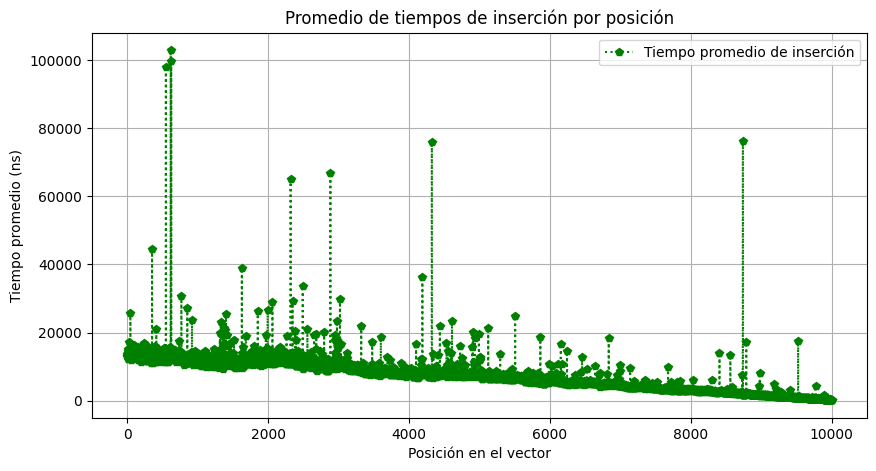

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Volver a procesar el archivo correctamente desde cero
file_path = "/content/data_insert.dat"

# Leer el archivo nuevamente
with open(file_path, "r") as file:
    lines = file.readlines()

# Diccionario para almacenar los tiempos por posición
position_times = {}

# Leer y procesar los datos
for line in lines:
    line = line.strip()
    if line:
        parts = line.split(";")
        if len(parts) == 2:
            try:
                time = int(parts[0])
                pos = int(parts[1])
                if pos not in position_times:
                    position_times[pos] = []
                position_times[pos].append(time)
            except ValueError:
                pass  # Ignorar líneas con errores

# Calcular el promedio de los tiempos por posición
average_times = {pos: np.mean(times) for pos, times in position_times.items()}

# Ordenar por posición
sorted_positions = sorted(average_times.keys())
sorted_avg_times = [average_times[pos] for pos in sorted_positions]

# Generar código en Python con los datos reales


# Datos de posiciones y tiempos promediados
positions = sorted_positions
average_times = sorted_avg_times

# Graficar los promedios
plt.figure(figsize=(10, 5))
plt.plot(positions, average_times, marker='p', linestyle=':', color='g', label='Tiempo promedio de inserción')
plt.xlabel("Posición en el vector")
plt.ylabel("Tiempo promedio (ns)")
plt.title("Promedio de tiempos de inserción por posición")
plt.legend()
plt.grid(True)
plt.show()


## Conclusión datos
Se puede observar en la gráfica que hacer un insert en las primeras posiciones tiene un tiempo de ejecución mayor que hacer un insert en una posición final, puesto que para hacer dicho método es necesario correr un espacio todos los valores siguientes a la posición donde queremos insertar un valor. Esto provoca que en las primeras posiciones sea tan demorada la ejecución, puesto que tiene que correr todo el vector un espacio al insertar un dato.

Los picos que se observan están dados por la complejidad del método resize(), ya que este método vuelve a copiar el vector creando más espacio cuando no tenemos la capacidad suficiente para insertar un nuevo dato.

In [21]:
from google.colab import files

uploaded = files.upload()

Saving data_erase.dat to data_erase.dat


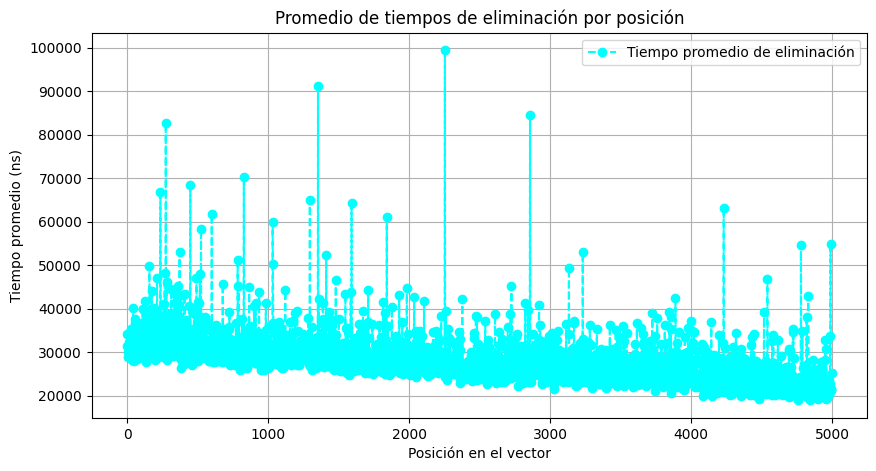

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def procesar_archivo(file_path):
    """Lee el archivo y calcula el promedio de tiempos por posición."""
    with open(file_path, "r") as file:
        lines = file.readlines()

    position_times = {}

    for line in lines:
        line = line.strip()
        if line:
            parts = line.split(";")
            if len(parts) == 2:
                try:
                    time = int(parts[0])
                    pos = int(parts[1])
                    if pos not in position_times:
                        position_times[pos] = []
                    position_times[pos].append(time)
                except ValueError:
                    pass  # Ignorar líneas con errores

    # Calcular promedios
    average_times = {pos: np.mean(times) for pos, times in position_times.items()}

    # Ordenar por posición
    sorted_positions = sorted(average_times.keys())
    sorted_avg_times = [average_times[pos] for pos in sorted_positions]

    return sorted_positions, sorted_avg_times

# Procesar ambos archivos
erase_positions, erase_times = procesar_archivo("/content/data_erase.dat")

# Espacio visual en la salida
print("\n" * 5)  # Esto agrega 5 líneas en blanco en la consola antes del segundo gráfico

# Gráfico de eliminación
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(erase_positions, erase_times, marker='o', linestyle='--', color='cyan', label='Tiempo promedio de eliminación')
ax2.set_xlabel("Posición en el vector")
ax2.set_ylabel("Tiempo promedio (ns)")
ax2.set_title("Promedio de tiempos de eliminación por posición")
ax2.legend()
ax2.grid(True)

plt.show()

## Conclusión datos
Se puede observar en la gráfica que hacer un erase o eliminar un dato en las primeras posiciones tiene un tiempo de ejecución mayor que hacer un erase en una posición final, puesto que, para hacer dicho método, es necesario correr un espacio a la izquierda todos los valores siguientes a la posición donde queremos eliminar un valor en X posición. Esto provoca que, en las primeras posiciones, la ejecución sea tan demorada, ya que tiene que recorrer todo el vector un espacio al eliminar un dato.

En este caso, los picos que se observan se los atribuimos a un posible error en la máquina, puesto que en este método no hacemos el método resize(), ya que solo necesitamos eliminar un dato.

---

## 🔄 2. Removing Duplicates

### ✅ Descripción
Se debe implementar una función que elimine los elementos duplicados de un vector, manteniendo el orden original.

```cpp

template <typename T>
Vector<T> removeDuplicates(const Vector<T>& vector){
    if(!vector.size()){
        return vector;
    }
    Vector<T> result;
     for(unsigned int i = 0; i < vector.size(); i++){
         bool bandera = true;
         for(unsigned int j = 0; j <  result.size(); j++){
             if(vector[i] == result[j]){
            bandera = false;
         }
     }
     if(bandera){
         result.push_back(vector[i]);
     }
 }
      return result;
    }
```

### 📊 Análisis de Complejidad

-Utilizando un unordered_set, la verificación de duplicados tiene una
 complejidad promedio de O(1), mientras que recorrer el vector requiere O(n), lo que resulta en una complejidad total de O(n).

-Por otro lado, si no se emplean estructuras adicionales, es necesario comparar
 cada elemento con los anteriores, lo que lleva a una complejidad de O(n²). Esto se debe a que, para cada elemento en el vector original, es preciso comprobar si ya ha sido ingresado en el vector sin duplicados.

---


In [ ]:
%%writefile Test_removeDuplicates.cpp
#include "vectoresclass.cpp"

using namespace std;

int main(){
    // prueba de removeDuplicates
    Vector<int> numbers = {1, 2, 2, 3, 4, 4, 5};
    Vector<int> uniqueNumbers = removeDuplicates(numbers);

    uniqueNumbers.print(); // Expected: {1, 2, 3, 4, 5}

    Vector<int> numbers2 = {1,1,1,1,1,1};
    Vector<int> uniqueNumbers2 = removeDuplicates(numbers2);
    uniqueNumbers2.print(); // Expected: {1}

    Vector<int> numbers3 = {};
    Vector<int> uniqueNumbers3 = removeDuplicates(numbers3);
    uniqueNumbers3.print(); // Expected: {}

    Vector<int> numbers4 = {1};
    Vector<int> uniqueNumbers4 = removeDuplicates(numbers4);
    uniqueNumbers4.print(); // Expected: {1}

    return 0;
}


Overwriting Test_removeDuplicates.cpp


In [ ]:
!g++ Test_removeDuplicates.cpp -o Test_removeDuplicates && ./Test_removeDuplicates

 1 2 3 4 5
 1

 1


## 📈 3. Dynamic Array Resizing Analysis

### ✅ Descripción
Se requiere analizar el crecimiento del tamaño y capacidad del vector a medida que se insertan elementos.

### 🔬 Experimento
- Insertar una gran cantidad de números aleatorios en el vector.
- Registrar tamaño y capacidad cada 1000 inserciones.
- Graficar la relación entre tamaño y capacidad considerando diferentes políticas de crecimiento.

### 📊 Políticas de Crecimiento Evaluadas
- +1: La capacidad aumenta en una unidad cada vez que se alcanza el límite.
- +2: La capacidad aumenta en dos unicades cada vez que llega al límite.
- +1.5x: La capacidad se multiplica por 1.5 cuando se llena.
- x2: La capacidad se duplica al alcanzar su límite.

```cpp
       void resize(){
       // cout << "resize" << endl;
       //capacity_ += 1;     // Aumentamos la nueva capacidad del Vector: politica de Brahian
       //capacity_ += 2;     // Aumentamos la nueva capacidad del Vector: politica de
        capacity_ *= 1.5;   // Aumentamos la nueva capacidad del Vector: politica de Carlos
      // capacity_ *= 1.7;   // Aumentamos la nueva capacidad del Vector: politica de
      //capacity_ *= 2;     // Aumentamos la nueva capacidad del Vector: politica de Martin
       T* storage2 = new T[capacity_];
       counter_++;
              for (unsigned int i = 0; i < size_; i++){
        storage2[i] = storage[i];

       }
       delete[] storage;
       storage = storage2;

    }
```

### 📊 Análisis
- Crecimiento +1: Ineficiente para grandes volúmenes de datos, ya que cada inserción adicional puede requerir una reasignación de memoria.
- Crecimiento +2: Casi igual de ineficiente que "+1", ya que cada inserción adicional puede requerir un traslado de la memoria a otro lugar repetidamente.
- Crecimiento x1.5: Compromiso entre eficiencia y uso de memoria.
- Crecimiento x2: Mayor eficiencia en inserciones masivas, pero con riesgo de sobreasignación de memoria.

Se espera que la política de duplicación (x2) tenga el mejor rendimiento en términos de velocidad y menos eficiente en espacio, mientras que la política de incremento lineal (+1) sea la menos eficiente en cuanto a el rendimiento debido a las frecuentes reasignaciones de memoria, aunque no derperdiciara memoria.

De esta manera se hara la toma de datos, guardando estos en un archivo con el nombre de "capacity_resize_" y la politica usada, cambiando en cada ejecucion del codigo, la politica de crecimiento del arreglo interno del vector.

```cpp
    // pruebas de arrays dinamicos
    random_device rd;
    mt19937 gen(rd());
    uniform_int_distribution<int> dist(1, 10000);

    ofstream data("capacity_resize_x1_5.dat", ios::app);
    Vector<int> vector;

    data << "Capacities\t" << "Resizes" << endl;
    for (int i = 0; i < 1000000; i++) {
        if(i % 1000 == 0){
            data << vector.capacity() << "\t\t" << vector.resizes() << endl;
            cout << vector.capacity() << "\t\t" << vector.resizes() << endl;
        }
        vector.push_back(dist(gen));
    }

```

---


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving capacity_resize_x2.dat to capacity_resize_x2.dat
Saving capacity_resize_x1_5.dat to capacity_resize_x1_5.dat
Saving capacity_resize_+2.dat to capacity_resize_+2.dat
Saving capacity_resize_+1.dat to capacity_resize_+1.dat


<Figure size 1000x600 with 0 Axes>

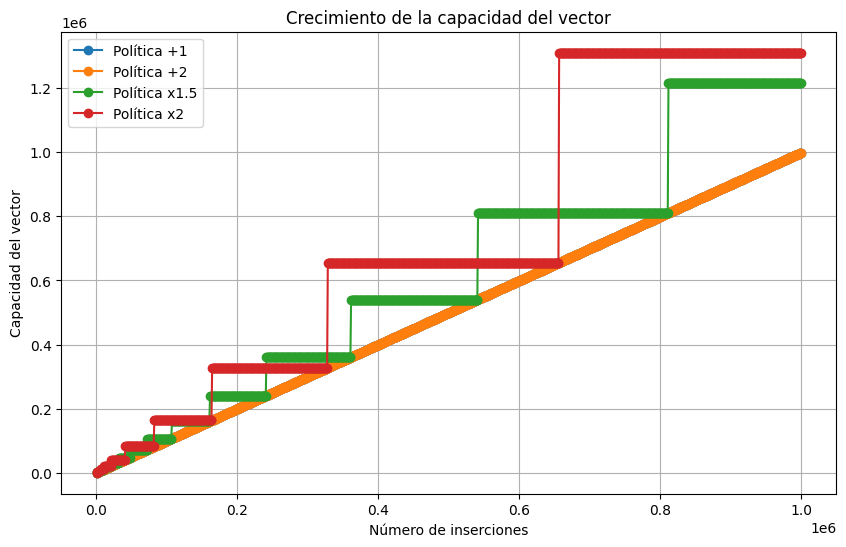

<Figure size 640x480 with 0 Axes>

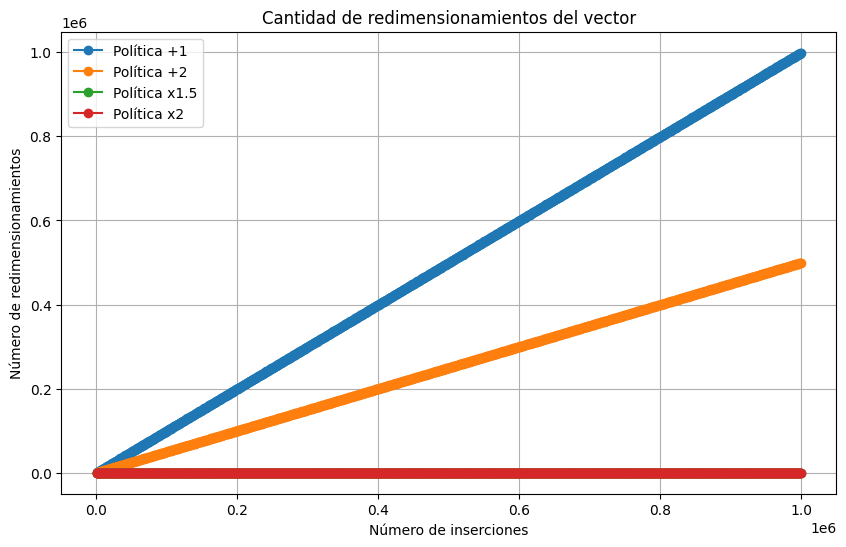

<Figure size 640x480 with 0 Axes>

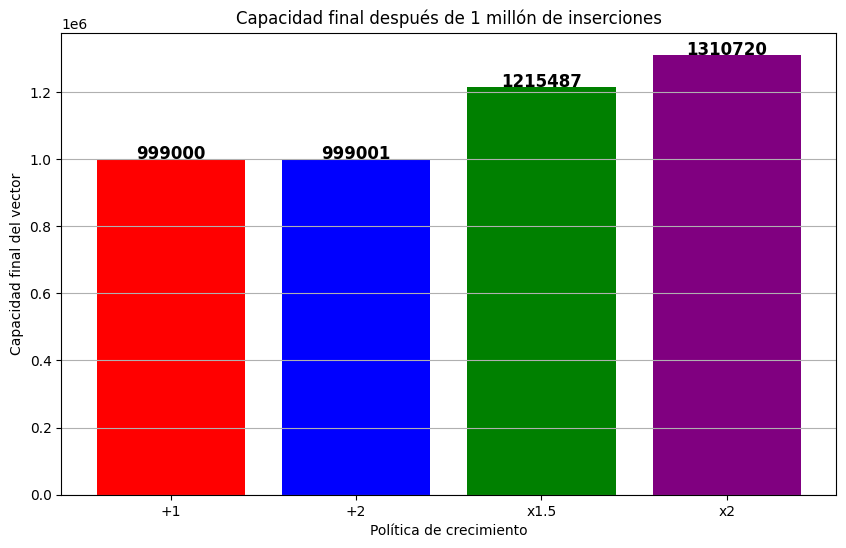

<Figure size 640x480 with 0 Axes>

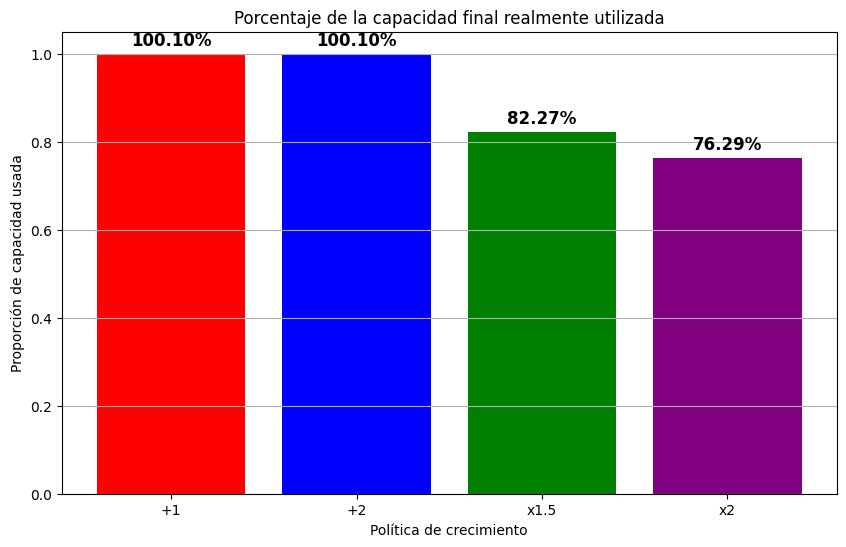

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Archivos de datos
files = {
     "+1": "/content/capacity_resize_+1.dat",
    "+2": "/content/capacity_resize_+2.dat",
    "x1.5": "/content/capacity_resize_x1_5.dat",
    "x2": "/content/capacity_resize_x2.dat"
}

# Leer y procesar los datos
data = {}
for policy, file_path in files.items():
    with open(file_path, "r") as f:
        lines = f.readlines()[1:]  # Omitir encabezado
        capacities, resizes = [], []

        for line in lines:
            parts = line.strip().split()
            if len(parts) == 2:  # Asegurar que haya dos valores por línea
                capacities.append(int(parts[0]))
                resizes.append(int(parts[1]))

        data[policy] = {
            "insertions": np.arange(1000, len(capacities) * 1000 + 1, 1000),
            "capacities": np.array(capacities),
            "resizes": np.array(resizes)
        }

# Crear figuras con más separación entre gráficos
plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)

# Graficar capacidad vs. inserciones
plt.figure(figsize=(10, 6))
for policy, values in data.items():
    plt.plot(values["insertions"], values["capacities"], marker='o', markersize=6, label=f"Política {policy}")

plt.xlabel("Número de inserciones")
plt.ylabel("Capacidad del vector")
plt.title("Crecimiento de la capacidad del vector")
plt.legend()
plt.grid()
plt.show()
plt.subplots_adjust(hspace=0.4)  # Espaciado entre gráficos

# Graficar número de resizes vs. inserciones
plt.figure(figsize=(10, 6))
for policy, values in data.items():
    plt.plot(values["insertions"], values["resizes"], marker='o', markersize=6, label=f"Política {policy}")

plt.xlabel("Número de inserciones")
plt.ylabel("Número de redimensionamientos")
plt.title("Cantidad de redimensionamientos del vector")
plt.legend()
plt.grid()
plt.show()
plt.subplots_adjust(hspace=0.4)

# Gráfico de capacidad final y uso real
final_capacities = [values["capacities"][-1] for values in data.values()]
used_space = [1000000 / final for final in final_capacities]  # Espacio usado en porcentaje

# Gráfica de capacidad final con valores exactos
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), final_capacities, color=['red', 'blue', 'green', 'purple'])

plt.xlabel("Política de crecimiento")
plt.ylabel("Capacidad final del vector")
plt.title("Capacidad final después de 1 millón de inserciones")
plt.grid(axis='y')

# Agregar etiquetas con los valores exactos en cada barra
for bar, capacity in zip(bars, final_capacities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500,  # Posición del texto
             str(capacity), ha='center', fontsize=12, fontweight='bold')

plt.show()
plt.subplots_adjust(hspace=0.4)

# Gráfica de porcentaje de capacidad usada
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), used_space, color=['red', 'blue', 'green', 'purple'])

plt.xlabel("Política de crecimiento")
plt.ylabel("Proporción de capacidad usada")
plt.title("Porcentaje de la capacidad final realmente utilizada")
plt.grid(axis='y')

# Agregar etiquetas con los valores exactos en cada barra
for bar, usage in zip(bars, used_space):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,  # Posición del texto
             f"{usage:.2%}", ha='center', fontsize=12, fontweight='bold')

plt.show()



---

## Conclusiones de los arreglos dínamicos
  En las gráficas podemos notar cómo las políticas de +1 y +2 son lineales (como se esperaba) y las políticas de *1.5 y *2.

Como se puede notar, la capacidad final después de un millón de inserciones es, en el caso de +1 y +2, ahorrativa, puesto que no tienen desperdicio de capacidad. En cambio, las políticas de *1.5 y *2 tienen un poco de desperdicio en su capacidad si no vamos a ingresar más valores.

En conclusión, recomendaría la política de *1.5, puesto que, estadísticamente hablando, esta política tiene una cantidad de resizes apropiada. Queda en utilidad disponible un porcentaje del 17,73% por si se desea insertar más datos, entonces no estaríamos desperdiciando tanta memoria en caso de que ya no insertáramos otro dato más, como sucede en el caso de la política *2.


---

---

## 🏗 4. Implementing a Stack Using a Vector

### ✅ Descripción
Se implementará una pila utilizando un vector. La pila debe admitir operaciones básicas como push, pop y peek.

```cpp
 template <typename T>
    class Stack{
    private:
     int top;
      Vector<T> storage;
      public:

      Stack(const T elem = T()){
       top = 0;
       storage.push_back(elem);
        }
      
      void push(const T elem){
        top++;
        storage.push_back(elem);
      }

      bool empty(){
        return top == -1;
      }

      T pop(){
         assert(empty() == 0);
        T elem = storage[top];
        storage.pop_back();
        top--;
        return elem;
      }
      
       T peek(){
        assert(empty() == 0);
        return storage.at(top);
      }

      void print(){
        cout << endl;
        for(int i = top; i >= 0; i--)
            cout << storage[i] << endl;
        cout << endl;
    }
    };
    

```

### 📊 Análisis de Complejidad
- La clase Stack<T> implementa una pila utilizando un vector dinámico (Vector<T>), permitiendo operaciones como inserción, eliminación, consulta y verificación de si está vacía.

- La operación push(elem) agrega un nuevo elemento al final del vector, tiene complejidad O(1) en promedio, aunque en casos raros donde se requiere aumentar la capacidad, llama a resize(), y el costo puede elevarse temporalmente a O(n), pero este crecimiento es amortizado.

- La operación pop() tiene complejidad O(1), puesto que solo estamos eliminando el último elemento que agregamos.

- La operación peek() tiene complejidad O(1), ya que solo estamos retornando el valor de la pila en top.
---


In [ ]:
%%writefile Test_Stack.cpp
#include "vectoresclass.cpp"

using namespace std;

int main(){
    // prueba de implementacion de Stack
    Stack<int> pila(10);

    pila.print();
    pila.pop();
    cout << pila.empty() << endl;
    pila.push(20);
    pila.push(30);
    pila.print();
    cout << pila.peek() << endl;
    pila.push(40);
    cout << pila.peek() << endl;
    pila.pop();
    pila.print();
    pila.push(50);
    cout << pila.peek() << endl;
    pila.print();

    return 0;
}


Writing Test_Stack.cpp


In [ ]:
!g++ Test_Stack.cpp -o Test_Stack && ./Test_Stack


10

1

30
20

30
40

30
20

50

50
30
20



---

## 🔗 5. Merge Sorted Vectors

### ✅ Descripción
Se debe fusionar dos vectores ordenados en un solo vector ordenado.
```cpp
template <typename T>
   void Mergesort( Vector<T>& organizar){

    if(organizar.size() == 1){
        return;
    }
        Vector<T> leftVector;
        Vector<T> rightVector;
        
     for(int i = 0; i < organizar.size(); i++){
        if(i < (organizar.size() / 2)){
         leftVector.push_back(organizar.at(i));
        }else{
            rightVector.push_back(organizar.at(i));
        }
     }
     Mergesort(leftVector);
     Mergesort(rightVector);

     Vector<int> Organizado;
     for(int i = 0, r = 0, l = 0; i < organizar.size(); i++){
        if(leftVector.size() == l){
            Organizado.push_back(rightVector.at(r));
            r++;
        } else if(rightVector.size() == r ){
            Organizado.push_back(leftVector.at(l));
            l++;
        }else if(leftVector.at(l) < rightVector.at(r)){
            Organizado.push_back(leftVector.at(l));
            l++;
        }
        else{
            Organizado.push_back(rightVector.at(r));
            r++;
        }
       
    }
    organizar = Organizado;
}

    template <typename T>
    Vector<T> mergeSortedVectors(Vector<T> vector1, Vector<T> vector2){
      if(!vector1.size()){
        return vector2;
      }
      if(!vector2.size()){
        return vector1;
      }
      if(!vector1.size() && !vector2.size()){
        return Vector<T>();
      }

      Vector<T> result;

      for(unsigned int i = 0; i < vector1.size(); i++){
        result.push_back(vector1[i]);
      }
      for(unsigned int i = 0; i < vector2.size(); i++){
        result.push_back(vector2[i]);
      }
    
        Mergesort(result);

    return result;
    }
```

### 📊 Análisis de Complejidad
El algoritmo comienza fusionando dos vectores en un solo vector nuevo, copiando cada uno de sus elementos. Este proceso tiene una complejidad de O(N), donde N es la suma de los tamaños de los vectores originales, ya que cada elemento se agrega al nuevo vector en tiempo constante.

Luego, si el vector resultante se ordena utilizando un algoritmo como MergeSort, la complejidad total se convierte en O(N + N log N). Esto se debe a que la fusión inicial requiere O(N), mientras que el ordenamiento posterior tiene una complejidad de O(N log N), lo que domina el tiempo total de ejecución. Como resultado, el proceso en su conjunto sigue una complejidad de O(N log N), asegurando eficiencia incluso para grandes volúmenes de datos.

---


In [ ]:
%%writefile Test_MergeSortedVectors.cpp
#include "vectoresclass.cpp"

using namespace std;

int main(){
    // prueba de mergeSortVectors
    Vector<int> vector1 = {1, 3, 5};
    Vector<int> vector2 = {2, 4, 6};
    Vector<int> mergedVector = mergeSortedVectors(vector1, vector2);

    mergedVector.print(); // Expected: {1, 2, 3, 4, 5, 6}

    Vector<int> vector3 = {1, 2, 3};
    Vector<int> vector4 = {};
    Vector<int> mergedVector2 = mergeSortedVectors(vector3, vector4);
    mergedVector2.print(); // Expected: {1, 2, 3}

    Vector<int> vector5 = {};
    Vector<int> vector6 = {4,5,6};
    Vector<int> mergedVector3 = mergeSortedVectors(vector5, vector6);
    mergedVector3.print(); // Expected: {4, 5, 6}

    Vector<int> vector7 = {1,1,1,1};
    Vector<int> vector8 = {1,1,1,1};
    Vector<int> mergedVector4 = mergeSortedVectors(vector7, vector8);
    mergedVector4.print(); // Expected: {1,1,1,1,1,1,1,1}

    Vector<int> vector9 = {1, 1, 2, 4, 20, 9, 3, 5};
    Vector<int> vector10 = {2, 4, 6, 10, 2};
    Vector<int> mergedVector5 = mergeSortedVectors(vector9, vector10);
    mergedVector5.print(); // Expected: {1, 1, 2, 2, 2, 3, 4, 4, 5, 6, 9, 10, 20}

    return 0;
}


Writing Test_MergeSortedVectors.cpp


In [ ]:
!g++ Test_MergeSortedVectors.cpp -o Test_MergeSortedVectors && ./Test_MergeSortedVectors

 1 2 3 4 5 6
 1 2 3
 4 5 6
 1 1 1 1 1 1 1 1
 1 1 2 2 2 3 4 4 5 6 9 10 20
